# Bài ôn tập buổi 6: Canxi 
#### Một sinh viên học khoa dinh dưỡng muốn xem xét mối quan hệ giữa lượng canxi (calcium_intake g/day) và kiến thức về canxi knowledge_score (thang đo 0 đến 5) ở các sinh viên trong lớp học. Và cô ấy muốn biết liệu kiến thức về canxi có thể được sử dụng để dự đoán lượng canxi của sinh viên hay không. Cô ấy đã thu thập dữ liệu và lưu trong tập tin canxi.xlsx.
### Hãy thực hiện các yêu cầu được liệt kê sau đây:
1. Đọc dữ liệu. Xem thông tin dữ liệu với head(), tail(), str(), summary().
2. Vẽ biểu đồ phân phối tần suất của knowledge_score. Nhận xét.
3. Thực hiện các thống kê cơ bản cho knowledge_score và calcium_intake (mean, median, mode, max, min, range)
4. Cho biết các giá trị ở phân vị thứ 20, 35, 65 và 90 của calcium_intake. Biểu diễn phân vị và giá trị tương ứng trên biểu đồ.
5. Vẽ boxplot cho knowledge_score và cho calcium_intake. knowledge_score có outlier hay không? calcium_intake có outlier hay không? Nếu có thì hãy thay thế outlier này bằng giá trị phù hợp. Giá trị bạn chọn để thay thế là giá trị nào (mean/median/…)? Giải thích.
6. Tìm phương sai (variance) của knowledge_score và calcium_intake.
7. Tìm độ lệch chuẩn (Standard deviation) của knowledge_score và calcium_intake.
8. Tìm độ xiên (Skewness) và độ nhọn (Kurtosis) của knowledge_score. Nhận xét kết quả.
9. Vẽ biểu đồ thể hiện mối quan hệ giữa knowledge_score và calcium_intake. Nhận xét.
10. Tính giá trị covariance, correlation giữa knowledge_score và calcium_intake.

In [1]:
library('ggplot2')
library('ggthemes')
library('ggExtra')
library('gridExtra')
library('GGally')

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'ggthemes' was built under R version 3.6.3"
Warning message:
"package 'ggExtra' was built under R version 3.6.3"
Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Warning message:
"package 'GGally' was built under R version 3.6.3"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
# install.packages("xlsx")

In [3]:
# library("xlsx")
library("ggplot2")
library("ggExtra")
library("tidyverse")
library("mlbench")
library("e1071")

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.4     

Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::combine() masks gridExtra::combine()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()

Warning message:
"package 'mlbench' was built under R version 3.6.3"
Warning message:
"package 'e1071' was built under R version 3.6.3"


#### 1. Đọc dữ liệu. Xem thông tin dữ liệu với head(), tail(), str(), summary(). 

In [4]:
library(readxl)
data=read_excel('Cung cap du lieu buoi 7/canxi.xlsx')

Warning message:
"package 'readxl' was built under R version 3.6.1"


In [5]:
head(data)

response_number,knowledge_score,calcium_intake
<dbl>,<dbl>,<dbl>
1,1.0,0.450
2,4.2,1.050
3,3.8,0.900
4,1.5,0.525
5,2.2,0.710
6,3.2,0.854


In [6]:
tail(data)

response_number,knowledge_score,calcium_intake
<dbl>,<dbl>,<dbl>
15,2.2,0.583
16,4.5,0.850
17,1.8,0.798
18,2.4,0.754
19,3.0,0.805
20,4.3,1.085


In [7]:
str(data)

tibble [20 x 3] (S3: tbl_df/tbl/data.frame)
 $ response_number: num [1:20] 1 2 3 4 5 6 7 8 9 10 ...
 $ knowledge_score: num [1:20] 1 4.2 3.8 1.5 2.2 3.2 4 1.4 2.6 3.2 ...
 $ calcium_intake : num [1:20] 0.45 1.05 0.9 0.525 0.71 0.854 0.8 0.493 0.73 0.894 ...


In [8]:
summary(data)

 response_number knowledge_score calcium_intake  
 Min.   : 1.00   Min.   :1.00    Min.   :0.4500  
 1st Qu.: 5.75   1st Qu.:2.20    1st Qu.:0.7250  
 Median :10.50   Median :2.90    Median :0.7990  
 Mean   :10.50   Mean   :2.96    Mean   :0.7851  
 3rd Qu.:15.25   3rd Qu.:3.85    3rd Qu.:0.8955  
 Max.   :20.00   Max.   :4.80    Max.   :1.0850  

#### 2. Vẽ biểu đồ phân phối tần suất của knowledge_score. Nhận xét. 

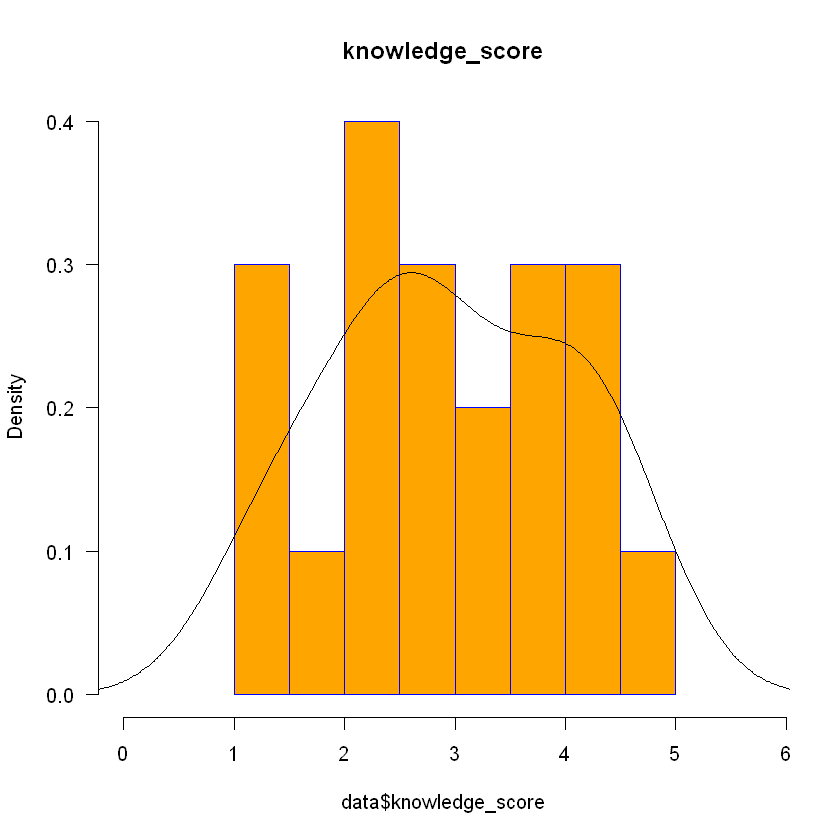

In [9]:
hist(data$knowledge_score, main='knowledge_score',
    xlim=c(min(data$knowledge_score)-1, max(data$knowledge_score)+1), col='orange',
    border='blue', breaks=10, las=1, freq=F)
lines(density(data$knowledge_score))

- Khoong chuan

#### 3. Thực hiện các thống kê cơ bản cho knowledge_score và calcium_intake (mean, median, mode, max, min, range) 

In [10]:
# data[,c('knowledge_score','calcium_intake')]

In [11]:
sapply(data[,c('knowledge_score','calcium_intake')], mean)

knowledge_score  calcium_intake 
         2.9600          0.7851

In [12]:
sapply(data[,c('knowledge_score','calcium_intake')], median)

knowledge_score  calcium_intake 
          2.900           0.799

In [13]:
sapply(data[,c('knowledge_score','calcium_intake')], mode)

knowledge_score  calcium_intake 
      "numeric"       "numeric"

In [14]:
sapply(data[,c('knowledge_score','calcium_intake')], max)

knowledge_score  calcium_intake 
          4.800           1.085

In [15]:
sapply(data[,c('knowledge_score','calcium_intake')], min)

knowledge_score  calcium_intake 
           1.00            0.45

In [16]:
sapply(data[,c('knowledge_score','calcium_intake')], range)

knowledge_score,calcium_intake
1.0,0.450
4.8,1.085


#### 4. Cho biết các giá trị ở phân vị thứ 20, 35, 65 và 90 của calcium_intake. Biểu diễn phân vị và giá trị tương ứng trên biểu đồ. 

In [17]:
quantile(data$calcium_intake, c(0.2, 0.35, 0.65,0.9))

20%     35%     65%     90% 
0.68460 0.74665 0.85140 0.99150

#### 5. Vẽ boxplot cho knowledge_score và cho calcium_intake. knowledge_score có outlier hay không? calcium_intake có outlier hay không? Nếu có thì hãy thay thế outlier này bằng giá trị phù hợp. Giá trị bạn chọn để thay thế là giá trị nào (mean/median/…)? Giải thích.

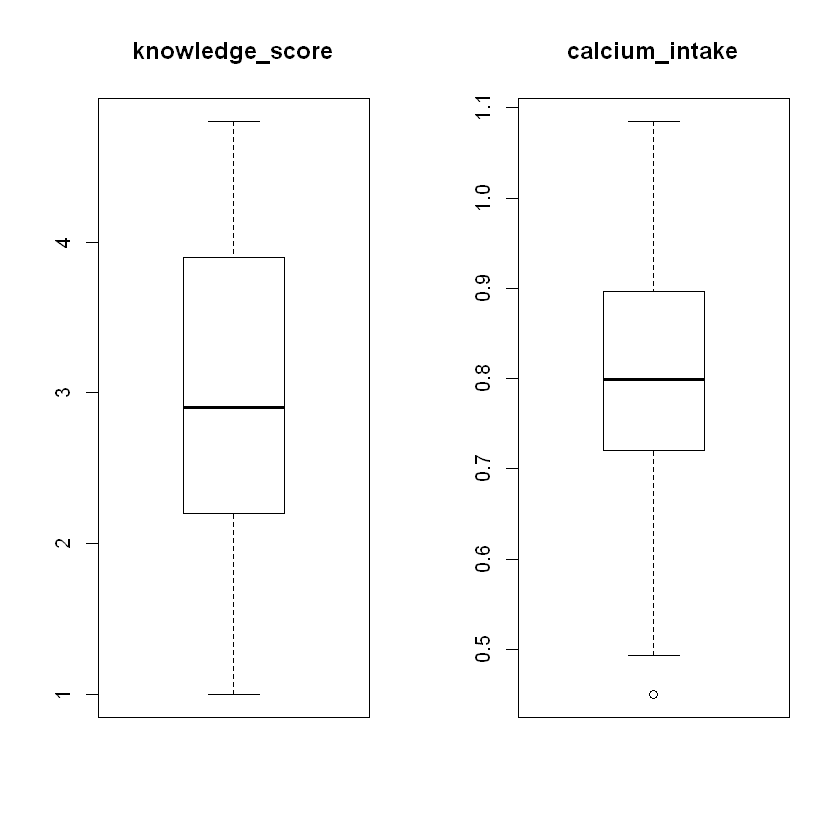

In [18]:
par(mfrow=c(1,2))
boxplot(data$knowledge_score, main='knowledge_score')
boxplot(data$calcium_intake, main='calcium_intake')

In [19]:
boxplot.stats(data$calcium_intake)$out

[1] 0.45

In [20]:
# Replace with median
data['calcium_intake'][data$calcium_intake==boxplot.stats(data$calcium_intake)$out,] = median(data$calcium_intake)

- Using median because dont need ignore Outliers

#### 6. Tìm phương sai (variance) của knowledge_score và calcium_intake. 

In [21]:
sapply(data[,c('knowledge_score','calcium_intake')], var)

knowledge_score  calcium_intake 
     1.22568421      0.02419152

#### 7. Tìm độ lệch chuẩn (Standard deviation) của knowledge_score và calcium_intake

In [22]:
sapply(data[,c('knowledge_score','calcium_intake')], sd)

knowledge_score  calcium_intake 
      1.1071062       0.1555362

#### 8. Tìm độ xiên (Skewness) và độ nhọn (Kurtosis) của knowledge_score. Nhận xét kết quả. 

In [23]:
sapply(data[,c('knowledge_score','calcium_intake')], skewness)

knowledge_score  calcium_intake 
    -0.02461969     -0.19964657

In [24]:
sapply(data[,c('knowledge_score','calcium_intake')], kurtosis)

knowledge_score  calcium_intake 
     -1.2456961      -0.4947523

#### 9. Vẽ biểu đồ thể hiện mối quan hệ giữa knowledge_score và calcium_intake có bổ sung thêm histogram phụ trên mỗi cột. Nhận xét biểu đồ. 

In [25]:
library(ggplot2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



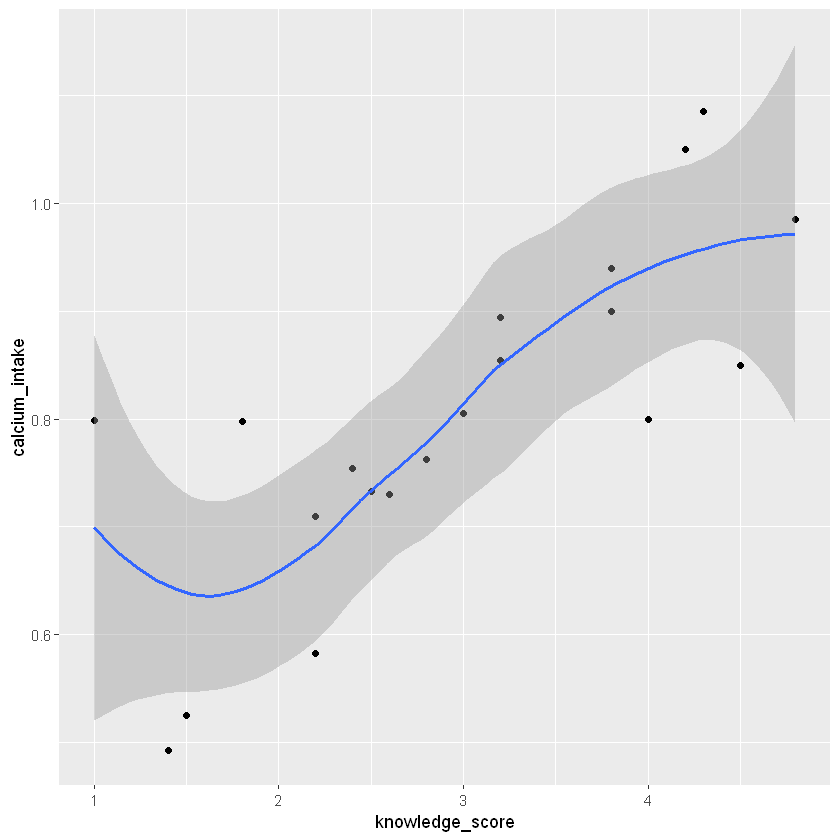

In [26]:
plot <- ggplot(data,aes(x=knowledge_score, y=calcium_intake)) + geom_point() + geom_smooth()

plot

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



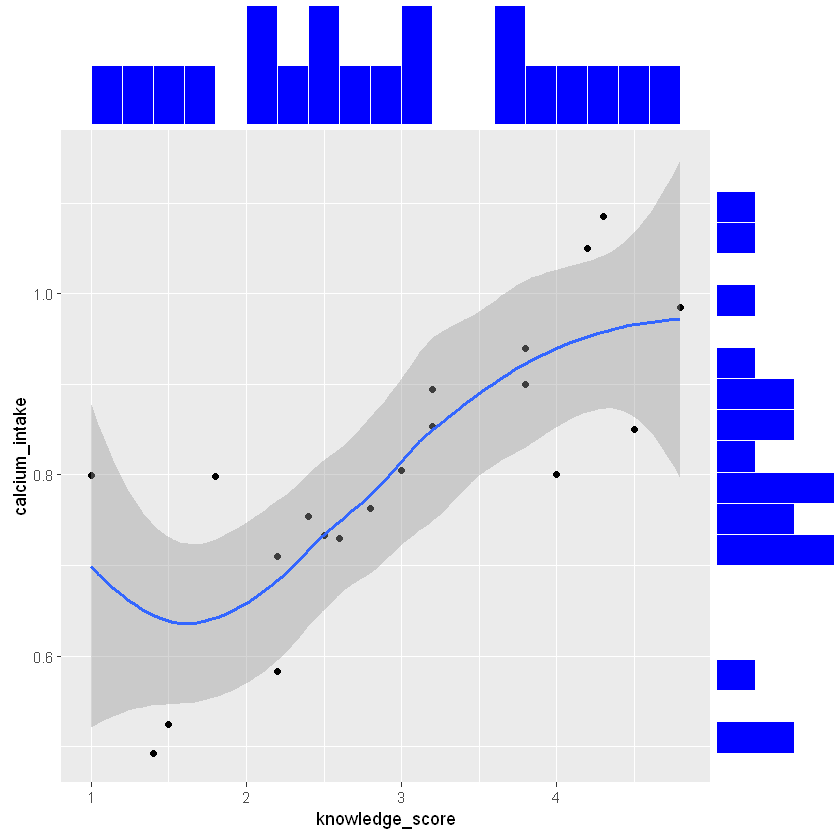

In [27]:
ggMarginal(plot, type='hist', col='white', fill='blue', bins=20)

#### 10. Tính giá trị covariance, correlation giữa knowledge_score và calcium_intake.  

In [28]:
library('corrplot')
cor(data[,c('knowledge_score','calcium_intake')])

Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded



,knowledge_score,calcium_intake
knowledge_score,1.0000000,0.7801247
calcium_intake,0.7801247,1.0000000
